# 5-1. Polar Coordinate

## 강의 소개

이번 강의에서는 직교 좌표계가 아닌 극 좌표계에서는 Polar Plot, Radar Plot에 대해 알아봅니다.

Polar Plot은 회전, 주기성 등을 표현하기에 적합하고 Radar Chart는 데이터의 Quality를 표현하기에 좋습니다.

또한 이후 적용이 가능한 데이터를 마주하면 바로 사용할 수 있도록 실습을 통해 코드를 익혀보겠습니다.

## Further Reading

Polar Chart와 Radar Chart 모두 [Matplotlib의 Projection](https://matplotlib.org/stable/api/projections_api.html)을 이용하였습니다. 이를 활용하면 3D 차트 등 다양한 형태의 시각화를 구현할 수 있습니다.

## 1. Polar Coordinate

**극 좌표계(Polar Coordinate)** 를 다루는 방법을 살펴보도록 하겠습니다.

### 1-1. Polar Coordinate 만들기

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

서브플롯 `ax`를 만들 때 `projection='polar'` 파라미터를 전달하면 다음과 같이 극좌표계를 사용할 수 있습니다.

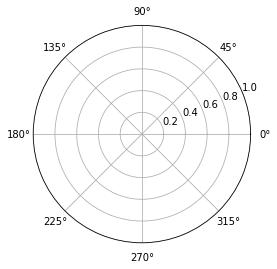

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
plt.show()

또는 `polar=True` 사용할 수 있습니다.

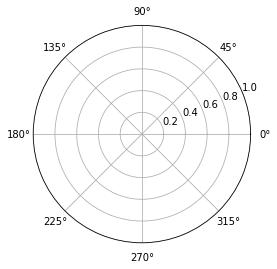

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
plt.show()

### 1-2. Polar Coordinate 조정하기

- `set_rmax` : 반지름 조정 
    - `set_rmin`을 조정한다면? 도넛형태가 될 수 있을까??
- `set_rticks` : 반지름 표기 grid 조정

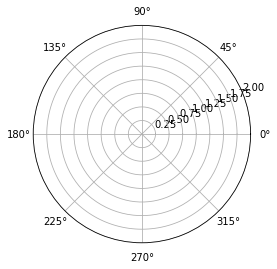

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

ax.set_rmax(2) # 반지름 최대값 2로 설정
# ax.set_rmin(1)
#ax.set_rticks([1, 1.5, 2])  


plt.show()

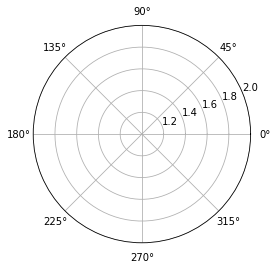

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

ax.set_rmax(2)
ax.set_rmin(1) # 반지름 최소값 1로 설정 (시작점(중심)이 1로 바뀜)
#ax.set_rticks([1, 1.5, 2])  


plt.show()

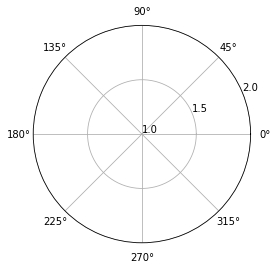

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

ax.set_rmax(2)
ax.set_rmin(1)
ax.set_rticks([1, 1.5, 2])  # 반지름 간격 설정


plt.show()

- `set_rlabel_position`: 반지름 label이 적히는 위치의 각도 조정

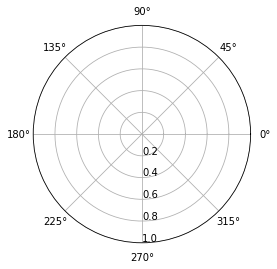

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.set_rlabel_position(-90) # 반지름 label이 적히는 위치 지정
plt.show()

각도를 조종하여 부채꼴 모양 사용

- `set_thetamin()` : 각도의 min값
- `set_thetamax()` : 각도의 max값

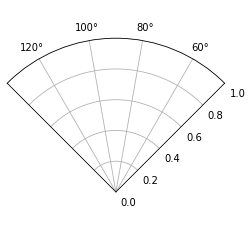

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# 1/4 부채꼴 그리기
ax.set_thetamin(45)
ax.set_thetamax(135)
plt.show()

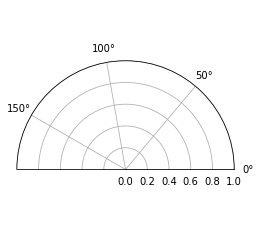

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# 반원 그리기
ax.set_thetamin(0)
ax.set_thetamax(180)
plt.show()

### 1-3. Polar 기본 차트

- `scatter()`: 산점도
  - 기존 산점도와 같음 (theta, r 순서)

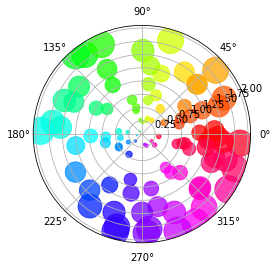

In [10]:
np.random.seed(19680801)

N = 100
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75) # scatter
plt.show()

- `bar()`: 막대그래프
  - 막대그래프는 처음에는 작게 시작해서 점점 넓게 그려진다.
  - 그렇기 때문에 실질적으로 크기 비교가 어렵다.

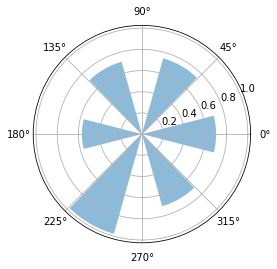

In [11]:
np.random.seed(19680801)

N = 6
r = np.random.rand(N)
theta = np.linspace(0, 2*np.pi, N, endpoint=False)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.bar(theta, r, width=0.5, alpha=0.5)
plt.show()

- `plot()`: 선그래프

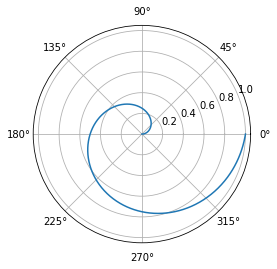

In [12]:
np.random.seed(19680801)

N = 1000
r = np.linspace(0, 1, N)
theta = np.linspace(0, 2*np.pi, N)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(theta, r)

plt.show()

- `fill()`: 채워진 선 그래프

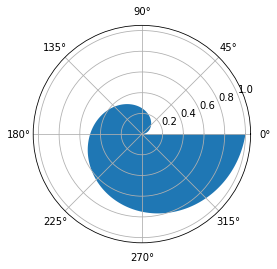

In [13]:
np.random.seed(19680801)

N = 1000
r = np.linspace(0, 1, N)
theta = np.linspace(0, 2*np.pi, N)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.fill(theta, r)
plt.show()

## 2. Radar Chart

### 2-1. Radar Chart 기본 틀 구성

위의 polar coordinate의 fill을 적합하게 사용하면 Radar Chart를 사용할 수 있습니다.

[Pokemon with Stat](https://www.kaggle.com/abcsds/pokemon) 데이터셋을 사용하여 만들어보겠습니다.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
%cd /content/drive/MyDrive/boostcamp/04_U-stage/000_Data Viz/00_data

/content/drive/MyDrive/boostcamp/04_U-stage/000_Data Viz/00_data


In [16]:
pokemon = pd.read_csv('./pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [17]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


데이터셋을 살펴보면 **HP, Attack, Defense, Sp.Atk, Sp.Def, Speed** 총 6가지 요소가 포켓몬의 역량을 나타내는 수치입니다.

6개의 요소의 통계를 보면 얼추 비슷한 스케일임을 알 수 있습니다. 이를 fill을 사용하여 그려보도록 하겠습니다.

In [18]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
values = pokemon.iloc[0][stats].to_list() # 이상해씨(Bulbasaur)의 스탯
print(values)

[45, 49, 49, 65, 65, 45]


각은 $2\pi$를 6등분하면 됩니다.

In [19]:
theta = np.linspace(0, 2*np.pi, 6, endpoint=False)
print(theta)

[0.         1.04719755 2.0943951  3.14159265 4.1887902  5.23598776]


`fill`과 `plot`을 사용하면 다음과 같이 그릴 수 있습니다.

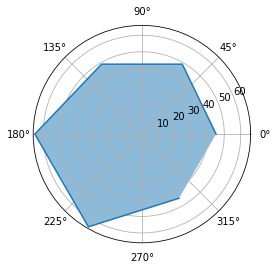

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

ax.plot(theta, values)
ax.fill(theta, values, alpha=0.5)
plt.show()

끝 점을 포함하기 위해 마지막 데이터를 포함시킵니다.

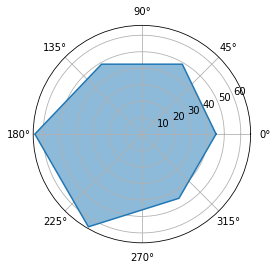

[45, 49, 49, 65, 65, 45, 45]
[0.0, 1.0471975511965976, 2.0943951023931953, 3.141592653589793, 4.1887902047863905, 5.235987755982988, 0.0]


In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

values.append(values[0]) # 테두리를 그려주기 위해 마지막 포인트 추가
theta = theta.tolist() + [theta[0]] # 테두리를 그려주기 위해 마지막 포인트 추가

ax.plot(theta, values)
ax.fill(theta, values, alpha=0.5)

plt.show()

print(values)
print(theta)

### 2-2. 커스텀 및 조정

- `set_thetagrids` : 각도에 따른 그리드 및 ticklabels 변경
- `set_theta_offset` : 시작 각도 변경 

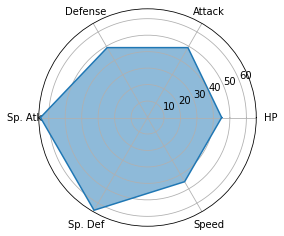

In [23]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='polar')

values = pokemon.iloc[0][stats].to_list()
values.append(values[0])

ax.plot(theta, values)
ax.fill(theta, values, alpha=0.5)

ax.set_thetagrids([n*60 for n in range(6)], stats) # 각도에 따른 그리드 및 label 지정
#ax.set_theta_offset(np.pi/2)

plt.show()

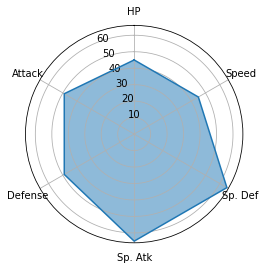

In [24]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='polar')

values = pokemon.iloc[0][stats].to_list()
values.append(values[0])

ax.plot(theta, values)
ax.fill(theta, values, alpha=0.5)

ax.set_thetagrids([n*60 for n in range(6)], stats)
ax.set_theta_offset(np.pi/2) # 시작 각도를 90도로 지정 (HP가 90도 위치로 이동)

plt.show()

이제 3개의 순차적 데이터를 비교해보도록 하겠습니다.

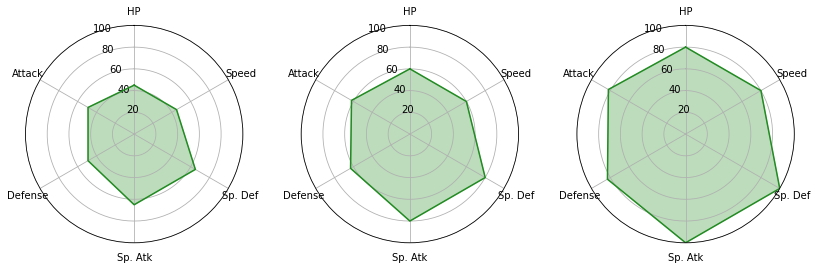

In [25]:
fig = plt.figure(figsize=(14, 4))

for idx in range(3):
    ax = fig.add_subplot(1,3,idx+1, projection='polar')

    values = pokemon.iloc[idx][stats].to_list() # 이상해씨, 이상해풀, 이상해꽃
    values.append(values[0])


    ax.plot(theta, values, color='forestgreen')
    ax.fill(theta, values, color='forestgreen', alpha=0.3)
    
    ax.set_rmax(100)
    ax.set_thetagrids([n*60 for n in range(6)], stats)
    ax.set_theta_offset(np.pi/2)
    
plt.show()


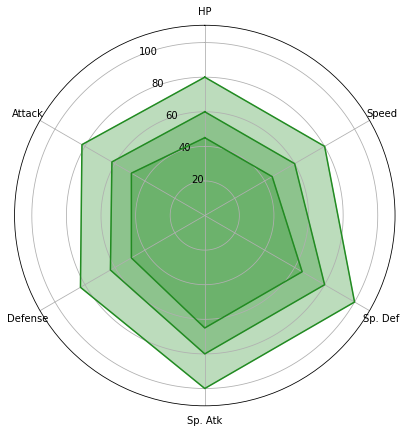

In [26]:
fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(111, projection='polar')

for idx in range(3):


    values = pokemon.iloc[idx][stats].to_list() # 이상해씨, 이상해풀, 이상해꽃 (겹쳐서 그리기)
    values.append(values[0])

    ax.plot(theta, values, color='forestgreen')
    ax.fill(theta, values, color='forestgreen', alpha=0.3)
    
ax.set_rmax(110)
ax.set_thetagrids([n*60 for n in range(6)], stats)
ax.set_theta_offset(np.pi/2)
    
plt.show()


- Radar Chart : https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html